In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('worldwide_coffee_habits.csv')
df

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262
...,...,...,...,...,...,...
9995,Country_26,2013,6.107139,11.553694,Mocha,95.808370
9996,Country_22,2013,7.848531,14.844245,Americano,121.098306
9997,Country_31,2019,2.152059,5.516845,Americano,97.327529
9998,Country_43,2012,5.715941,4.641472,Cappuccino,33.916437


In [112]:
for col in df:
    df = df.rename({col: col.lower()}, axis=1)

In [113]:
changename = {
    'coffee consumption (kg per capita per year)': 'coffee consumption',
    'average coffee price (usd per kg)': 'average price',
    'type of coffee consumed': 'coffee type'
}
df = df.rename(changename, axis=1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                10000 non-null  object 
 1   year                   10000 non-null  int64  
 2   coffee consumption     10000 non-null  float64
 3   average price          10000 non-null  float64
 4   coffee type            10000 non-null  object 
 5   population (millions)  10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


In [115]:
df.nunique()

country                     50
year                        24
coffee consumption       10000
average price            10000
coffee type                  5
population (millions)    10000
dtype: int64

In [116]:
for col in df.select_dtypes(include=object):
    print({col: df[col].unique()})

{'country': array(['Country_39', 'Country_29', 'Country_15', 'Country_43',
       'Country_8', 'Country_21', 'Country_19', 'Country_23',
       'Country_11', 'Country_24', 'Country_36', 'Country_40',
       'Country_3', 'Country_22', 'Country_2', 'Country_44', 'Country_30',
       'Country_38', 'Country_33', 'Country_12', 'Country_25',
       'Country_49', 'Country_27', 'Country_42', 'Country_28',
       'Country_16', 'Country_47', 'Country_37', 'Country_7', 'Country_9',
       'Country_18', 'Country_4', 'Country_14', 'Country_50',
       'Country_26', 'Country_20', 'Country_35', 'Country_17',
       'Country_6', 'Country_34', 'Country_10', 'Country_31',
       'Country_48', 'Country_45', 'Country_41', 'Country_1', 'Country_5',
       'Country_13', 'Country_32', 'Country_46'], dtype=object)}
{'coffee type': array(['Americano', 'Mocha', 'Latte', 'Espresso', 'Cappuccino'],
      dtype=object)}


In [117]:
np.sort(df['year'].unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [118]:
df_new = df.groupby(['year', 'country', 'coffee type']).sum().reset_index()

In [119]:
df_new

,year,country,coffee type,coffee consumption,average price,population (millions)
0,2000,Country_1,Americano,11.478508,23.709347,198.635861
1,2000,Country_1,Cappuccino,18.151153,24.954268,277.416013
2,2000,Country_1,Espresso,13.159190,19.780292,121.452658
3,2000,Country_1,Latte,20.722930,29.338705,218.533147
4,2000,Country_1,Mocha,6.445628,12.686640,85.003860
...,...,...,...,...,...,...
4855,2023,Country_8,Mocha,8.986956,6.745076,102.878014
4856,2023,Country_9,Americano,17.925883,22.832072,99.279590
4857,2023,Country_9,Cappuccino,2.456053,9.003259,90.336512
4858,2023,Country_9,Latte,30.428756,41.625515,359.196454


In [120]:
for year in np.unique(df_new['year']):
    for country in np.unique(df_new['country']):
        df_selected = df_new[(df_new['year'] == year) & (df_new['country'] == country)]
        n_group = df_selected.shape[0]
        i = df_selected.index
        df_new.loc[i, 'average price'] = df_selected['average price'] / n_group

In [122]:
df = df_new

In [123]:
df.isna().sum()

year                     0
country                  0
coffee type              0
coffee consumption       0
average price            0
population (millions)    0
dtype: int64

In [124]:
df.duplicated().sum()

0

In [125]:
df.duplicated().sum()

0

In [126]:
labels = [x for x in set(df['coffee type'])]
encode = {labels[i]: i for i in range(len(labels))}
decode = {i: labels[i] for i in range(len(labels))}

df['coffee type'] = df['coffee type'].apply(lambda x: encode[x])

In [127]:
df['coffee type'] = df['coffee type'].astype(np.int64)
df['year'] = df['year'].astype('object')

In [128]:
target = 'coffee type'
col = df.columns[df.columns != target]
col = np.append(col, target)

In [129]:
df_cleaned = df[col].select_dtypes(exclude=object)

<AxesSubplot: xlabel='coffee type', ylabel='count'>

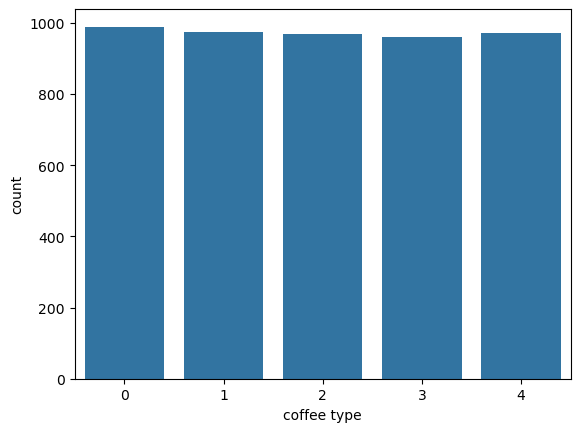

In [130]:
sns.countplot(df_cleaned, x='coffee type')

<AxesSubplot: >

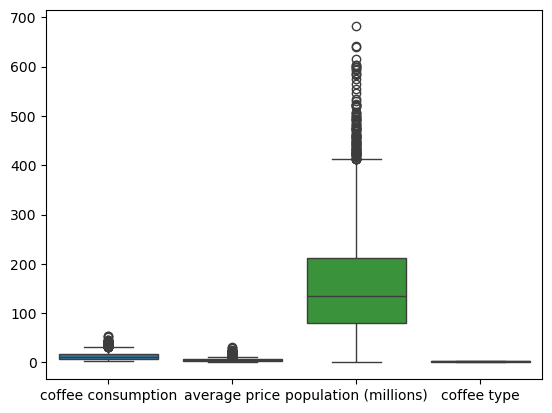

In [131]:
sns.boxplot(df_cleaned)

<AxesSubplot: ylabel='Count'>

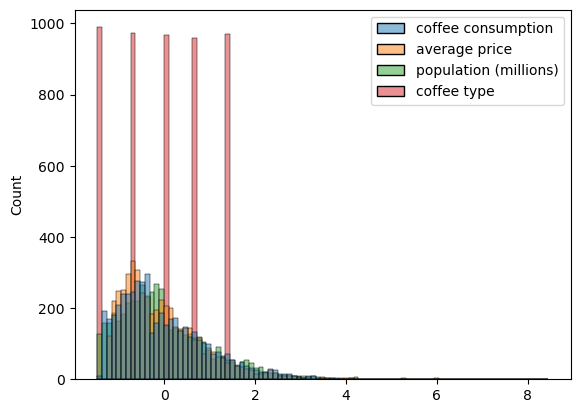

In [132]:
standarized = pd.DataFrame({})
for col in df_cleaned:
    standarized[col] = (df_cleaned[col] - np.mean(df_cleaned[col], axis=0)) / np.std(df_cleaned[col], axis=0)

sns.histplot(standarized)

In [133]:
df_cleaned

,coffee consumption,average price,population (millions),coffee type
0,11.478508,4.741869,198.635861,2
1,18.151153,4.990854,277.416013,4
2,13.159190,3.956058,121.452658,0
3,20.722930,5.867741,218.533147,1
4,6.445628,2.537328,85.003860,3
...,...,...,...,...
4855,8.986956,1.686269,102.878014,3
4856,17.925883,5.708018,99.279590,2
4857,2.456053,2.250815,90.336512,4
4858,30.428756,10.406379,359.196454,1


<Figure size 4000x4000 with 0 Axes>

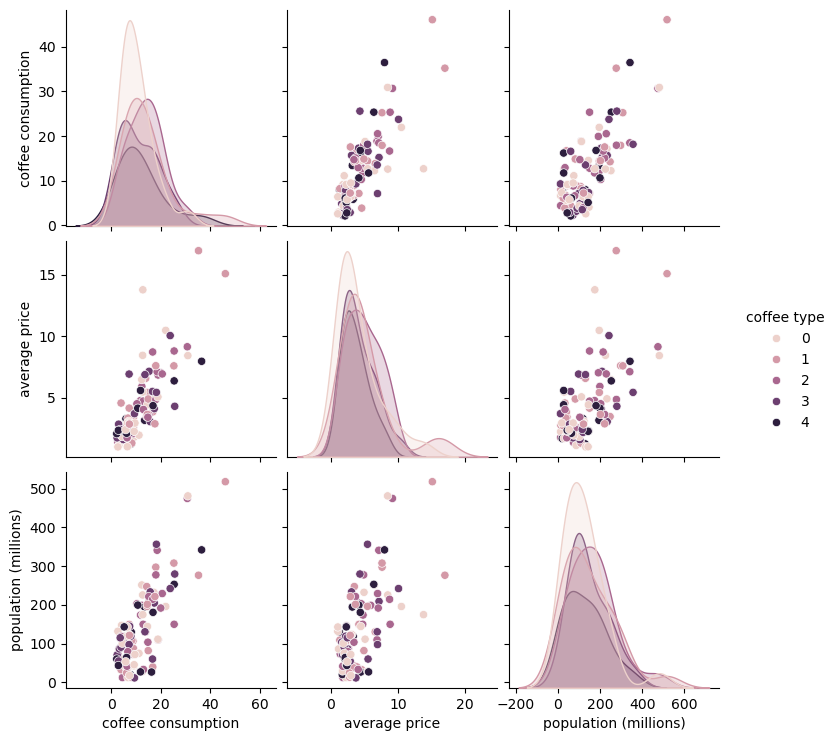

In [134]:
plt.figure(figsize=(40, 40))
sns.pairplot(df_cleaned.sample(100), hue='coffee type')

In [135]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

In [136]:
X

,coffee consumption,average price,population (millions)
0,11.478508,4.741869,198.635861
1,18.151153,4.990854,277.416013
2,13.159190,3.956058,121.452658
3,20.722930,5.867741,218.533147
4,6.445628,2.537328,85.003860
...,...,...,...
4855,8.986956,1.686269,102.878014
4856,17.925883,5.708018,99.279590
4857,2.456053,2.250815,90.336512
4858,30.428756,10.406379,359.196454


In [137]:
y

0       2
1       4
2       0
3       1
4       3
       ..
4855    3
4856    2
4857    4
4858    1
4859    3
Name: coffee type, Length: 4860, dtype: int64

In [138]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4]), array([989, 973, 968, 959, 971]))

In [139]:
def train_test_split(X, y, train_size=None, random_state=None,*,stratisfy=None):
    train = {'X': [], 'y': []}
    test = {'X': [], 'y': []}
    
    if stratisfy is None:
        n_sample = X.shape[0]
        np.random.seed(random_state)
        idx = np.random.permutation(n_sample)
        train_size = int(train_size * n_sample)
    
        train['X'], train['y'] = X.iloc[idx[:train_size]], y.iloc[idx[:train_size]]
        test['X'], test['y'] = X.iloc[idx[train_size:]], y.iloc[idx[train_size:]]
    else:
        for label in np.unique(stratisfy):
            i = y[y == label].index
            x_i = X.iloc[i]
            y_i = y.iloc[i]
            
            n_sample = x_i.shape[0]
            
            np.random.seed(42)
            idx = np.random.permutation(n_sample)
            train_i = int(train_size * n_sample)
            
            train['X'].append(x_i.iloc[idx[:train_i]])
            train['y'].append(y_i.iloc[idx[:train_i]])
            test['X'].append(x_i.iloc[idx[train_i:]])
            test['y'].append(y_i.iloc[idx[train_i:]])
        
        for x in train:
            train[x] = pd.concat(train[x])
            test[x] = pd.concat(test[x])
    
    return train['X'], test['X'], train['y'], test['y']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratisfy=y)

In [141]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([791, 778, 774, 767, 776]))

In [142]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4]), array([198, 195, 194, 192, 195]))

In [143]:
class Node:
    def __init__(self, left=None, right=None, feature=None, threshold=None,*,value = None):
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None

In [144]:
class DTClassifier:
    def __init__(self, sample_min_split = 2, max_depth=100, random_state=None):
        self.sample_min_split = sample_min_split
        self.max_depth = max_depth
        self.random_state = random_state
        self.root = None
        
    def fit(self, X, y):
        self.root = self._create_tree(X, y)
    
    def _create_tree(self, X, y, depth=0):
        n_label = len(np.unique(y))
        n, m = X.shape
    
        if (depth >= self.max_depth or n <= self.sample_min_split or n_label == 1):
            leaf = self._most_common_label(y)
            return Node(value=leaf)
        
        np.random.seed(self.random_state)
        feat_idxs = np.random.choice(m, int(np.sqrt(m)), replace=False)
                
        feature, threshold = self._best_split(X, y, feat_idxs)
        
        left_idxs, right_idxs = self._split(X[:, feature], threshold)
                
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            leaf = self._most_common_label(y)
            return Node(value=leaf)
        
        
        left = self._create_tree(X[left_idxs], y[left_idxs], depth+1)
        right = self._create_tree(X[right_idxs], y[right_idxs], depth+1)
        
        return Node(left, right, feature, threshold)
    
    def _best_split(self, X, y, feat_idxs):
        best_ig = -1
        split_feat, split_thresh = None, None
        
        for feat_idx in feat_idxs:
            x_col = X[:, feat_idx]
            thresholds = np.unique(x_col)
        
            for threshold in thresholds:
                ig = self._information_gain(x_col, y, threshold)
                if ig > best_ig:
                    best_ig = ig
                    split_feat = feat_idx
                    split_thresh = threshold
        
        return split_feat, split_thresh
    
    def _information_gain(self, X, y, threshold):
        parent_entropy = self._entropy(y)
        right_idxs, left_idxs = self._split(X, threshold)
        
        n = X.shape[0]
        n_left, n_right = len(right_idxs), len(left_idxs)
        left_entropy, right_entropy = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
        
        ig = parent_entropy - child_entropy
        
        return ig
        
    def _split(self, X, threshold):
        left = np.argwhere(X <= threshold).flatten()
        right = np.argwhere(X > threshold).flatten()
        return left, right

    def _entropy(self, y):
        _, count = np.unique(y, return_counts=True)
        prob = count / len(y)
        return -np.sum([p * np.log2(p) for p in prob if p > 0])
    
    def _most_common_label(self, y):
        n_label = {}
        for label in set(y):
            count = len(y[y == label])
            n_label.update({label: count})
            
        print(n_label)
        highest_count = 0
        most_common = None
        
        for label in n_label:
            if n_label[label] > highest_count:
                highest_count = n_label[label]
                most_common = label
                
        return most_common
    
    def predict(self, X):
        result = [self._traverse_node(x, self.root) for x in X]
        return np.array(result)
    
    def _traverse_node(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] < node.threshold:
            return self._traverse_node(x, node.left)
        return self._traverse_node(x, node.right)

In [145]:
clf = DTClassifier(sample_min_split=2, max_depth=100, random_state=42)
clf.fit(X_train.values, y_train.values)
clf.predict(X_test.values)

{0: 791, 1: 778, 2: 774, 3: 767, 4: 776}


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [217]:
class GaussianNB:
    def __init__(self, X, y):
        self.n, self.m = X.shape
        
        self.classes = np.unique(y)
        n_label = len(self.classes)
        
        self.prior = np.zeros(n_label)
        self.var = []
        self.mean = []
        
        for (idx, cls) in enumerate(self.classes):
            x_i = X[y == cls]
            
            self.prior[idx] = len(x_i) / self.n
            self.mean.append(np.mean(x_i, axis=0))
            self.var.append(np.var(x_i, axis=0) + 1e-9)
                    
    def predict(self, X):
        if len(X.shape) == 1:
            X = np.expand_dims(X, axis=0)
        n, m = X.shape
        
        posterior = np.zeros([n, len(self.classes)])
        for i in range(n):
            for (idx, cls) in enumerate(self.classes):
                
                log_prior = np.log(self.prior[idx])
                log_likelihood = np.sum(self._log_pdf(X[i], idx))
                
                posterior[i, idx] = log_prior + log_likelihood
        result = np.argmax(posterior, axis=1)
        
        return self.classes[result]
    
    def _log_pdf(self, X, idx):
        mean = self.mean[idx]
        var = self.var[idx]
        return -0.5 * ((X - mean) ** 2) / var - 0.5 * np.log(2 * np.pi * var)

In [218]:
clf = GaussianNB(X_train.values, y_train.values)
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

In [219]:
n_label = len(np.unique(y_train))
label = np.unique(y_train)

In [220]:
train_mx = np.zeros([n_label, n_label]).astype(np.int64)

for i in range(y_pred_train.shape[0]):
    pred = y_pred_train[i]
    actual = y_train.values[i]
    train_mx[pred, actual] += 1

train_mx

array([[588, 535, 556, 544, 554],
       [131, 178, 147, 150, 166],
       [  0,   0,   0,   0,   0],
       [ 35,  29,  33,  33,  18],
       [ 37,  36,  38,  40,  38]])

<AxesSubplot: >

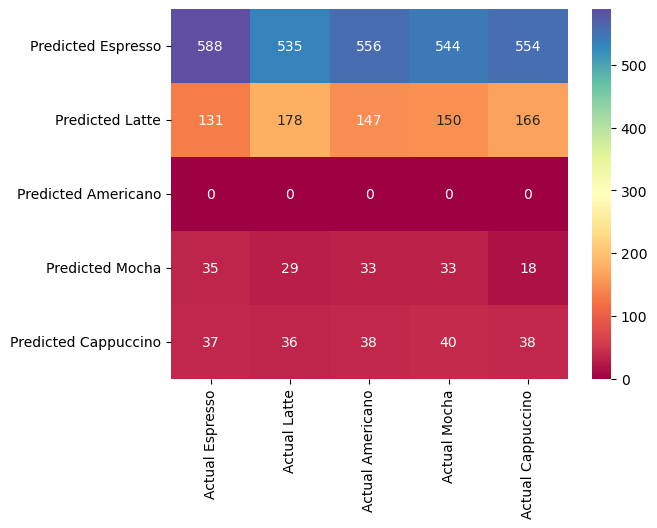

In [221]:
sns.heatmap(train_mx, annot=True, cmap='Spectral', fmt='d',
            xticklabels=[f'Actual {decode[x]}' for x in label],
            yticklabels=[f'Predicted {decode[x]}' for x in label])

In [222]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([791, 778, 774, 767, 776]))

In [223]:
test_mx = np.zeros([n_label, n_label]).astype(np.int64)

for i in range(y_pred_test.shape[0]):
    pred = y_pred_test[i]
    actual = y_test.values[i]
    test_mx[pred, actual] += 1

test_mx

array([[133, 145, 138, 141, 140],
       [ 46,  34,  29,  36,  36],
       [  0,   0,   0,   0,   0],
       [  4,   8,  16,   7,  10],
       [ 15,   8,  11,   8,   9]])

<AxesSubplot: >

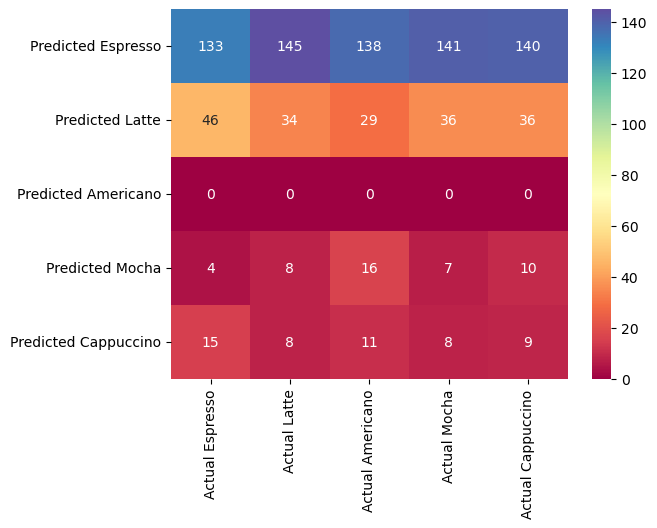

In [224]:
sns.heatmap(test_mx, annot=True, cmap='Spectral', fmt='d',
            xticklabels=[f'Actual {decode[x]}' for x in label],
            yticklabels=[f'Predicted {decode[x]}' for x in label])